# Explanation of this Notebook

Why do we need to analyze this data? What's the value?

# Data

In [2]:
# Download corpuses required

In [3]:
# Processing
import numpy as np
import pandas as pd
import re

# Visualisation

import seaborn as sns
import matplotlib.pyplot as plt

# Spacy packages
import spacy
from spacy import displacy
from spacy.lang.en.stop_words import STOP_WORDS

# NLTK packages
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt', quiet=True)

True

In [4]:
# Import data
df = pd.read_csv('https://raw.githubusercontent.com/jonnybegreat/test-repo/master/twitter_train.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/jonnybegreat/test-repo/master/twitter_test.csv')

What is this data about?

In [5]:
df.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


![alt text](https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F2205222%2F8e4d65f2029797e0462b52022451829c%2Fdata.PNG?generation=1590752860255531&alt=media)

What data might be important in predicting climate change sentiment?

Let's extract some data from each tweet and put it in separate columns...

MAKE ALL OF THESE FUNCTIONS, SPLIT WECTIONS INTO HASHTAGS, MENTIONS, IF TWEET IS RETWEET THEN RETURN FIRST MENTION (THIS IS THE PERSON WHO RETWEETED) OTHER RANDOMS, WHY ARE EACH OF THESE IMPORTANT(RT TELLS US THAT SOMEONE IS SHARING SOMEONE ELSES VIEW)?

In [6]:
# Create new columns for :  number of characters/tweet,emoticons/tweet,number of emoticons/tweet,list of # per tweet, 
#                           list of mentions/tweet,number of words/tweet(might need to be done after tokenization),Named Entities

# Create copies
df_with_metadata = df.copy()
test_df_with_metadata = test_df.copy()

# Hashtags function - NEEDS TO BE EDITED TO INCLUDE MULTIPLE HASHTAGS
def hashtag_column(x):

    hashtags = []
    new_tag_list = []

    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)         

    for tag in hashtags:
        if tag == []:
            tag = np.nan
        new_tag_list.append(tag)
        
    return new_tag_list

# Mentions function - NEEDS TO BE EDITED TO INCLUDE MULTIPLE MENTIONS
def mention_column(x):

    mentions = []
    new_mention_list = []

    for i in x:
        ht = re.findall(r"@(\w+)", i)
        mentions.append(ht)         

    for tag in mentions:
        if tag == []:
            tag = np.nan
        new_mention_list.append(tag)
        
    return new_mention_list

# Tokenized
df_with_metadata['message_token'] = df_with_metadata['message'].apply(lambda x: word_tokenize(x))

# Is this a retweet?
df_with_metadata['retweet'] = ['yes' if df_with_metadata['message'][i][:2] == 'RT' else 'no' for i in range(len(df_with_metadata))]

# What hashtags to we have and how many?
df_with_metadata['hashtags'] = hashtag_column(df_with_metadata['message'])
test_df_with_metadata['hashtags'] = hashtag_column(test_df_with_metadata['message'])
df_with_metadata['hashtag_count'] = df_with_metadata['message'].apply(lambda tweet: len([word for word in tweet.split() if word.startswith('#')]))
test_df_with_metadata['hashtag_count'] = test_df_with_metadata['message'].apply(lambda tweet: len([word for word in tweet.split() if word.startswith('#')]))

# Who is mentioned to we have and how many mentions per tweet?
df_with_metadata['mentions'] = mention_column(df_with_metadata['message'])
test_df_with_metadata['mentions'] = mention_column(test_df_with_metadata['message'])
df_with_metadata['mention_count'] = df_with_metadata['message'].apply(lambda tweet: len([word for word in tweet.split() if word.startswith('@')]))
test_df_with_metadata['mention_count'] = test_df_with_metadata['message'].apply(lambda tweet: len([word for word in tweet.split() if word.startswith('@')]))

# How many words and characters per tweet?
df_with_metadata['char_count'] = df_with_metadata['message'].str.len()
test_df_with_metadata['char_count'] = test_df_with_metadata['message'].str.len()
df_with_metadata['word_count'] = df_with_metadata['message'].str.split().str.len()
test_df_with_metadata['word_count'] = test_df_with_metadata['message'].str.split().str.len()

# Average word length
df_with_metadata['avg_word_length'] = df_with_metadata['message'].apply(lambda tweet: round(sum([len(word) for word in tweet.split()]) / len(tweet.split()),2))
test_df_with_metadata['avg_word_length'] = test_df_with_metadata['message'].apply(lambda tweet: round(sum([len(word) for word in tweet.split()]) / len(tweet.split()),2))

# How many stopwords per tweet
df_with_metadata['stopword_count'] = df_with_metadata['message'].apply(lambda tweet: len([word for word in tweet.split() if word in STOP_WORDS]))
test_df_with_metadata['stopword_count'] = test_df_with_metadata['message'].apply(lambda tweet: len([word for word in tweet.split() if word in STOP_WORDS]))


# EDA for all data

In [7]:
df_with_metadata.head()

,sentiment,message,tweetid,message_token,retweet,hashtags,hashtag_count,mentions,mention_count,char_count,word_count,avg_word_length,stopword_count
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,"[PolySciMajor, EPA, chief, does, n't, think, c...",no,NaN,0,[mashable],1,140,19,6.42,3
1,1,It's not like we lack evidence of anthropogeni...,126103,"[It, 's, not, like, we, lack, evidence, of, an...",no,NaN,0,NaN,0,62,10,5.30,3
2,2,RT @RawStory: Researchers say we have three ye...,698562,"[RT, @, RawStory, :, Researchers, say, we, hav...",yes,NaN,0,[RawStory],1,140,19,6.42,8
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,"[#, TodayinMaker, #, WIRED, :, 2016, was, a, p...",no,[TodayinMaker],1,NaN,0,99,15,5.67,5
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,"[RT, @, SoyNovioDeTodas, :, It, 's, 2016, ,, a...",yes,[ElectionNight],1,[SoyNovioDeTodas],1,122,18,5.83,5


How many of these tweets are in each category?

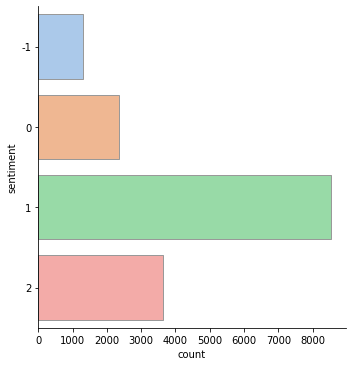

In [8]:
sns.catplot(y="sentiment", kind="count", edgecolor=".6",palette="pastel",data=df_with_metadata);

As we can see the mojority of the tweets are positive towards climate change. This shows that the data is unbalanced which may affect our prediction results.

How many of these tweets are retweets?

## Retweets

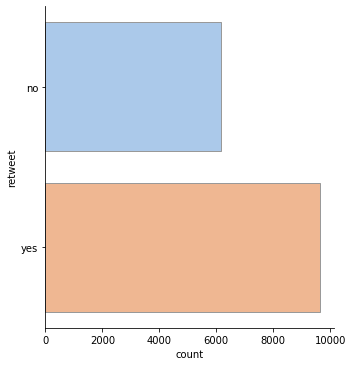

In [11]:
sns.catplot(y="retweet", kind="count", edgecolor=".6",palette="pastel",
            data=df_with_metadata);

Almost two-thirds of these tweets are Retweets! This means that there might be alot of duplicate tweets.Let's have a look at some of these retweets:
(We will first need to remove the hyperlinks as they change for every tweet)

In [12]:
# Create a function to clean the tweets

def cleanTxt(text):
  
  
  #text = re.sub('Ã¢â‚¬Â¦', '', text) #Removing @mentions
  #text = re.sub('#', '', text) # Removing '#' hash tag
  #text = re.sub('RT[\s]+', '', text) # Removing RT
  text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
  #text = re.sub(':', '', text) # Removing ':'
  #text = text.lower()
  #text = word_tokenize(text)
  
  return text


# Clean the tweets
df_with_metadata['message'] = df_with_metadata['message'].apply(cleanTxt)
test_df_with_metadata['message'] = test_df_with_metadata['message'].apply(cleanTxt)

In [13]:
df_with_metadata['message'].value_counts()

RT @StephenSchlegel: she's thinking about how she's going to die because your husband doesn't believe in climate change                               307
RT @SenSanders: We have a president-elect who doesn't believe in climate change. Millions of people are going to have to say: Mr. TÃ¢â‚¬Â¦            130
RT @NatGeoChannel: Watch #BeforeTheFlood right here, as @LeoDiCaprio travels the world to tackle climate change  httÃ¢â‚¬Â¦                            73
RT @BernieSanders: #ImVotingBecause the future of the planet is at stake. Hillary Clinton will combat climate change. Donald Trump thinks iÃ¢â‚¬Â¦     59
RT @SethMacFarlane: HRC proposes installing half a billion solar panels by the end of her first term. Trump thinks climate change is a hoaxÃ¢â‚¬Â¦     56
                                                                                                                                                     ... 
RT @mashable: No, Donald Trump is not deleting tweets about China and global

As we can see there are quite a few tweets which are duplicates - let's remove the duplicates. there also seems to be a recurrence of the special character combination 'Ã¢â‚¬Â¦'. Let's remove the duplicate Tweets as well as this special character combination :

In [14]:


def cleanTxt(text):
  
  
  text = re.sub('Ã¢â‚¬Â¦', '', text) #Removing @mentions
  #text = re.sub('#', '', text) # Removing '#' hash tag
  #text = re.sub('RT[\s]+', '', text) # Removing RT
  #text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
  #text = re.sub(':', '', text) # Removing ':'
  #text = text.lower()
  #text = word_tokenize(text)
  
  return text


# Clean the tweets
df_with_metadata['message'] = df_with_metadata['message'].apply(cleanTxt)
test_df_with_metadata['message'] = test_df_with_metadata['message'].apply(cleanTxt)

RT @StephenSchlegel: she's thinking about how she's going to die because your husband doesn't believe in climate change                             307
RT @SenSanders: We have a president-elect who doesn't believe in climate change. Millions of people are going to have to say: Mr. T                 130
RT @NatGeoChannel: Watch #BeforeTheFlood right here, as @LeoDiCaprio travels the world to tackle climate change  htt                                 73
RT @BernieSanders: #ImVotingBecause the future of the planet is at stake. Hillary Clinton will combat climate change. Donald Trump thinks i          59
RT @SethMacFarlane: HRC proposes installing half a billion solar panels by the end of her first term. Trump thinks climate change is a hoax          56
                                                                                                                                                   ... 
RT @CStevenTucker: .@POTUS to sign sweeping directive to dramatically shrink role 'clima

In [16]:
df_with_metadata.drop_duplicates(subset ="message", keep = False, inplace = True) 

In [17]:
df_with_metadata['message'].value_counts()

How algae could make global warming worse                                                                                                      1
RT @EnvDefenseFund: Obama administration outlines path for climate change resiliency.                                                          1
RT @MClouvis: Africa did not contribute to global warming but will suffer greatly from it. Perhaps may suffer more than any other continen…    1
RT @Rottoturbine: Also, Earth woefully unprepared for unsurprising and totally predictable human induced climate change                        1
@MissMollyMoore Admit he's wrong about climate change? Be honest in general and stop trying to fleece the public?                              1
                                                                                                                                              ..
RT @robfee: 'lol climate change isn't real, you idiot.' - Guy that DVRs 8 different 'Searching for Bigfoot' shows                 

## Hashtags & Mentions

We can tell alot from sentiment of tweets by looking at the hashtags which are used. 

What are the most used hashtags?

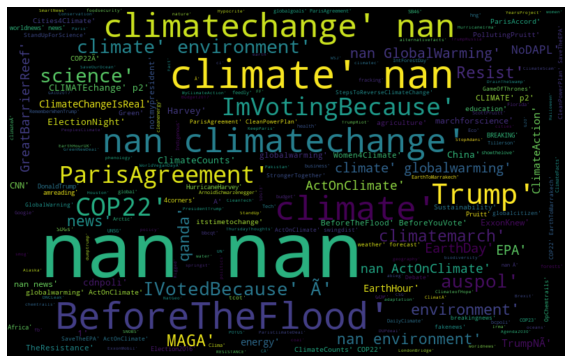

In [106]:
all_words_hastags = ' '.join([text for text in df_with_metadata['hashtags'].astype(str)])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_hastags)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

ignoring the NAN values its seems as though the hashtags which are prominent includes : 'I'm Voting Because', 'Paris Agreement', 'Trump','MAGA' etc. This makes it seem as though these tweets are also politically related.

Let's have a look at mentions :

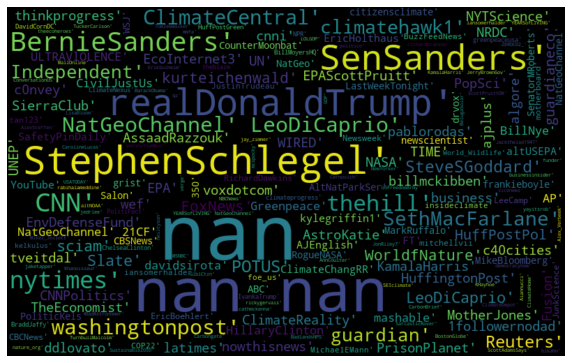

In [107]:
all_words_mentions = ' '.join([text for text in df_with_metadata['mentions'].astype(str)])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_mentions)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

ignoring the NAN values again its seems as though the mentions which are prominent include : 'StephenSchlegel', 'SenSanders', 'realDonaldTrump' etc. Which also makes it seem as though these tweets were taking during the election time.

Let's have a look at character count distribution for these tweets:

## Character and Word Count

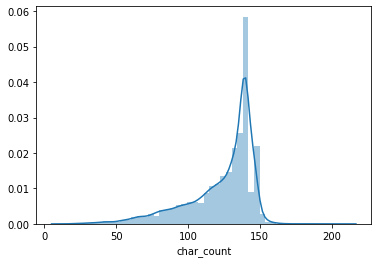

In [108]:
sns.distplot(df_with_metadata['char_count'])

We can see from this plot that most of the tweets are using the full amount of characters allowed (140). We will see how this changes in each category. 

Lets have a look at the different categories in the next section:

# EDA for categories

Let's also create separate dataframes in order analyze each category

In [124]:
# Dataframes for each category
df_negative_tweets = df_with_metadata[df['sentiment'] == -1]
df_neutral_tweets = df_with_metadata[df['sentiment'] == 0]
df_positive_tweets = df_with_metadata[df['sentiment'] == 1]
df_news_tweets = df_with_metadata[df['sentiment'] == 2]
df_negative_tweets.head()

,sentiment,message,tweetid,message_token,retweet,hashtags,hashtag_count,mentions,mention_count,char_count,word_count,avg_word_length,stopword_count
28,-1,Sally Kohn’s latest evidence of climate change...,355491,"[Sally, Kohn, ’, s, latest, evidence, of, clim...",no,NaN,0,[twitchyteam],1,139,21,5.67,8
46,-1,@realDonaldTrump Carbon Tax is a Globalist ide...,61141,"[@, realDonaldTrump, Carbon, Tax, is, a, Globa...",no,NaN,0,[realDonaldTrump],1,137,21,5.57,8
48,-1,RT @SteveSGoddard: We had winds close to 100 M...,719523,"[RT, @, SteveSGoddard, :, We, had, winds, clos...",yes,NaN,0,[SteveSGoddard],1,136,24,4.67,9
56,-1,@MissLizzyNJ lmao 😂 snowflakes ❄️ complaining ...,911385,"[@, MissLizzyNJ, lmao, 😂, snowflakes, ❄️, comp...",no,NaN,0,[MissLizzyNJ],1,96,14,5.93,2
57,-1,RT @Dawn2334Dawn: This is ONE of Arnold Schwar...,768263,"[RT, @, Dawn2334Dawn, :, This, is, ONE, of, Ar...",yes,NaN,0,[Dawn2334Dawn],1,140,21,5.71,7


Let's have a look at what the most common hashtags are per category - COMBINE THESE INTO A SUBPLOT

## Negative

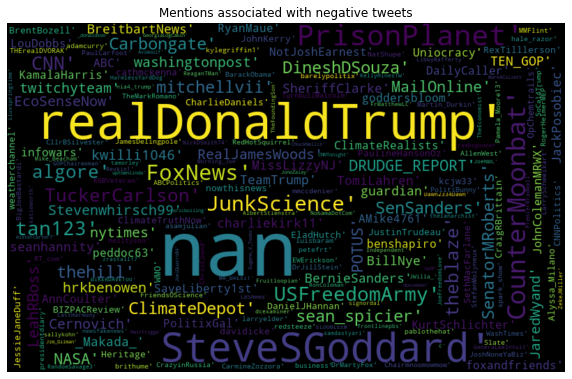

In [110]:
all_words_mentions_neg = ' '.join([text for text in df_negative_tweets['mentions'].astype(str)])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_mentions_neg)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Mentions associated with negative tweets')
plt.show()

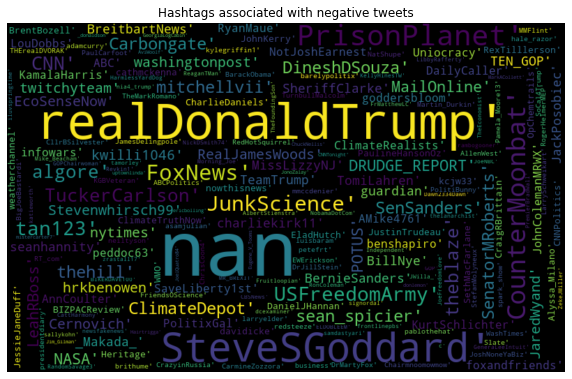

In [126]:
all_words_hashtags_neg = ' '.join([text for text in df_negative_tweets['hashtags'].astype(str)])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_mentions_neg)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Hashtags associated with negative tweets')
plt.show()

## Neutral

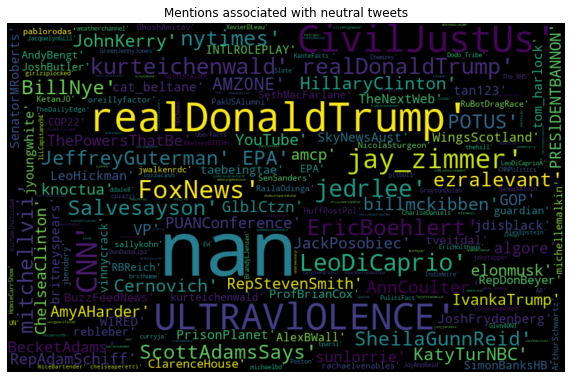

In [112]:
all_words_mentions_neut = ' '.join([text for text in df_neutral_tweets['mentions'].astype(str)])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_mentions_neut)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Mentions associated with neutral tweets')
plt.show()

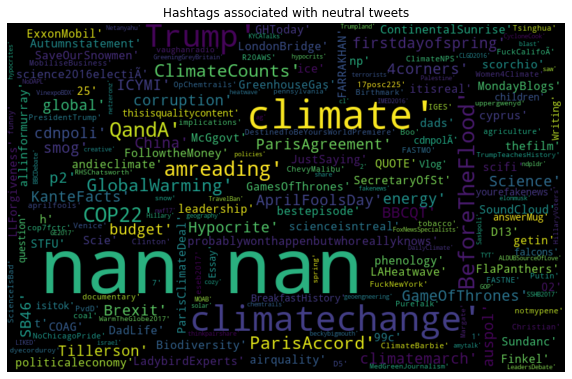

In [127]:
all_words_hashtags_neut = ' '.join([text for text in df_neutral_tweets['hashtags'].astype(str)])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_hashtags_neut)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Hashtags associated with neutral tweets')
plt.show()

## Positive

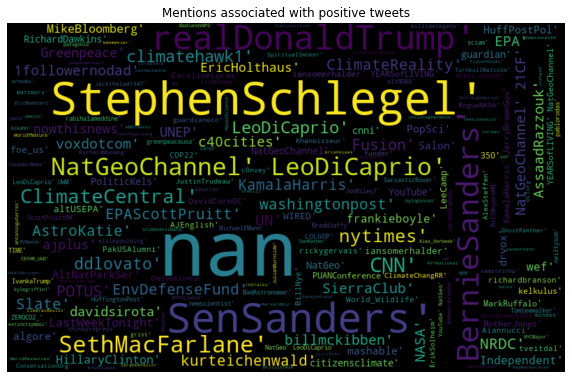

In [114]:
all_words_mentions_pos = ' '.join([text for text in df_positive_tweets['mentions'].astype(str)])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_mentions_pos)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Mentions associated with positive tweets')
plt.show()

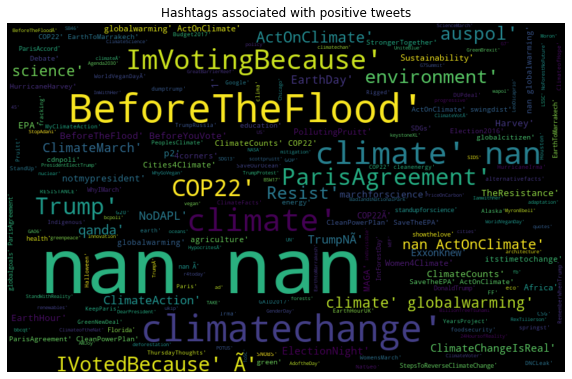

In [115]:
all_words_hashtags_pos = ' '.join([text for text in df_positive_tweets['hashtags'].astype(str)])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_hashtags_pos)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Hashtags associated with positive tweets')
plt.show()

## News

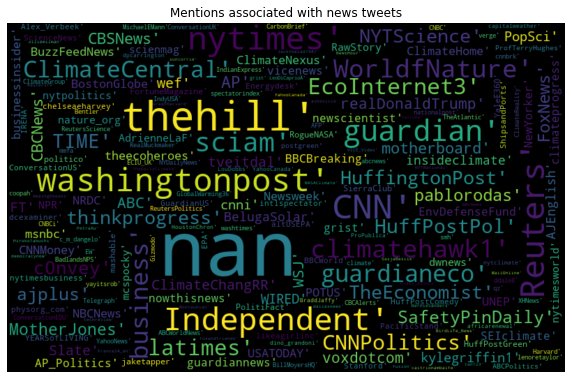

In [116]:
all_words_mentions_news = ' '.join([text for text in df_news_tweets['mentions'].astype(str)])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_mentions_news)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Mentions associated with news tweets')
plt.show()

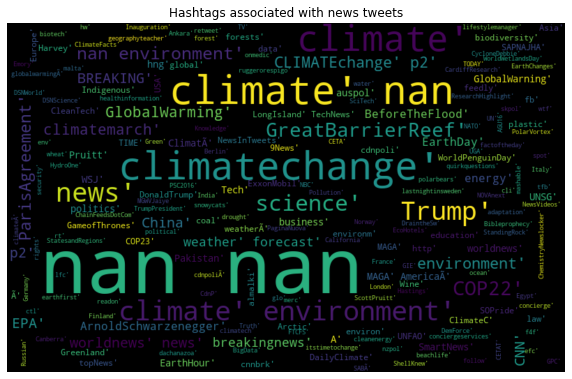

In [117]:
all_words_hashtags_news = ' '.join([text for text in df_news_tweets['hashtags'].astype(str)])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_hashtags_news)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Hashtags associated with news tweets')
plt.show()

# Important Words

# Base Model

# Preprocessing

In [ ]:
# Remove links

In [ ]:
# Tokenize (experiment with different tokenizers)

In [ ]:
# Convert to lowercase

In [ ]:
# POS tagging (experiment)

In [ ]:
# Perform NER and add your own values (experiment)

In [ ]:
# Stemming (experiment)

In [ ]:
# Lemmatization (experiment)

In [ ]:
# Remove punctuation

In [ ]:
# Remove numbers

In [ ]:
# Create custom stopwords list (add 'RT')

In [ ]:
# Remove stopwords

# EDA

In [ ]:
# Most common words for all tweets

In [ ]:
# Most common words for tweets per category

In [ ]:
# Most common bigrams per category

In [ ]:
# Average word count for each tweet per category

In [ ]:
# Average character count for each tweet per category

In [ ]:
# Investigate hashtags

In [ ]:
# Investigate mentions

In [ ]:
# Investigate Retweets

In [ ]:
# Investigate Emoticons

In [ ]:
# Investigate Clustering

In [ ]:
# Revise stopwords list

# Vectorize

In [ ]:
# Import vectorizers

In [ ]:
# Tfidf vectorizer for base model

In [ ]:
# Perform gridsearch or vectorizer parameters

In [ ]:
# Create function to check different vectorizers performance

# Topic Modelling

In [ ]:
# LDA clustering - have to use countvectorizer

In [ ]:
# NNMF - use Tfidf Vectorizer - do this in conjunction with 1vR model

# Balance Data

In [ ]:
# Use upsampling for base model

In [ ]:
# Test different balancing techniques

In [ ]:
# Understand which data needs to be resampled and what it does to the model

# Models

In [ ]:
# Import easy models

In [ ]:
# Fit Models

In [ ]:
# Check best performing for baseline model (use cross validation)

In [ ]:
# Perform grid search for best parameters for best model

In [ ]:
# Investigate more complex modelling techniqes and implement separately

# Model Evaluation

In [ ]:
# Look at model performance (confusion matrix,accuracy,f1score)

In [ ]:
# Figure out what is causing the false positives and false negatives and update model to fix these

# Kaggle Output

In [ ]:
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
import itertools, string, operator, re, unicodedata, nltk
from operator import itemgetter
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer, RegexpTokenizer
from bs4 import BeautifulSoup
import numpy as np
from itertools import combinations
from gensim.models import Phrases
from collections import Counter

#Contraction map
c_dict = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "i'd": "I would",
  "i'd've": "I would have",
  "i'll": "I will",
  "i'll've": "I will have",
  "i'm": "I am",
  "i've": "I have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}

c_re = re.compile('(%s)' % '|'.join(c_dict.keys()))

add_stop = ['', ' ', 'say', 's', 'u', 'ap', 'afp', '....', 'n', '\\','rt',' ...', '... ','…','¢','â','¬','...','ã',',','¦']

stop_words = ENGLISH_STOP_WORDS.union(add_stop)

tokenizer = TweetTokenizer()
pattern = r"(?u)\b\w\w+\b" 

lemmatizer = WordNetLemmatizer()

punc = list(set(string.punctuation))

def casual_tokenizer(text): #Splits words on white spaces (leaves contractions intact) and splits out trailing punctuation
    tokens = tokenizer.tokenize(text)
    return tokens

#Function to replace the nltk pos tags with the corresponding wordnet pos tag to use the wordnet lemmatizer
def get_word_net_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None
    
def lemma_wordnet(tagged_text):
    final = []
    for word, tag in tagged_text:
        wordnet_tag = get_word_net_pos(tag)
        if wordnet_tag is None:
            final.append(lemmatizer.lemmatize(word))
        else:
            final.append(lemmatizer.lemmatize(word, pos=wordnet_tag))
    return final

def expandContractions(text, c_re=c_re):
    def replace(match):
        return c_dict[match.group(0)]
    return c_re.sub(replace, text)

def remove_html(text):
    soup = BeautifulSoup(text, "html5lib")
    tags_del = soup.get_text()
    uni = unicodedata.normalize("NFKD", tags_del)
    bracket_del = re.sub(r'\[.*?\]', '  ', uni)
    apostrphe = re.sub('’', "'", bracket_del)
    string = apostrphe.replace('\r','  ')
    string = string.replace('\n','  ')
    extra_space = re.sub(' +',' ', string)
    return extra_space

def process_text(text):
    soup = BeautifulSoup(text, "lxml")
    tags_del = soup.get_text()
    no_html = re.sub('<[^>]*>', '', tags_del)
    tokenized = casual_tokenizer(no_html)
    lower = [item.lower() for item in tokenized]
    decontract = [expandContractions(item, c_re=c_re) for item in lower]
    tagged = nltk.pos_tag(decontract)
    lemma = lemma_wordnet(tagged)
    no_num = [re.sub('[0-9]+', '', each) for each in lemma]
    no_punc = [w for w in no_num if w not in punc]
    no_stop = [w for w in no_punc if w not in stop_words]
    return no_stop

def word_count(text):
    return len(str(text).split(' '))

def word_freq(clean_text_list, top_n):
    """
    Word Frequency
    """
    flat = [item for sublist in clean_text_list for item in sublist]
    with_counts = Counter(flat)
    top = with_counts.most_common(top_n)
    word = [each[0] for each in top]
    num = [each[1] for each in top]
    return pd.DataFrame([word, num]).T

def word_freq_bigrams(clean_text_list, top_n):
    """
    Word Frequency With Bigrams
    """
    bigram_model = Phrases(clean_text_list, min_count=2, threshold=1)
    w_bigrams = list(bigram_model[clean_text_list])
    flat_w_bigrams = [item for sublist in w_bigrams for item in sublist]
    with_counts = Counter(flat_w_bigrams)
    top = with_counts.most_common(top_n)
    word = [each[0] for each in top]
    num = [each[1] for each in top]
    return pd.DataFrame([word, num]).T


def bigram_freq(clean_text_list, top_n):
    bigram_model = Phrases(clean_text_list, min_count=2, threshold=1)
    w_bigrams = list(bigram_model[clean_text_list])
    flat_w_bigrams = [item for sublist in w_bigrams for item in sublist]
    bigrams = []
    for each in flat_w_bigrams:
        if '_' in each:
            bigrams.append(each)
    counts = Counter(bigrams)
    top = counts.most_common(top_n)
    word = [each[0] for each in top]
    num = [each[1] for each in top]
    return pd.DataFrame([word, num]).T

In [ ]:
import pandas as pd
import numpy as np
import json


'''Features'''
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import label_binarize

'''Classifiers'''
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

'''Metrics/Evaluation'''
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from scipy import interp
from itertools import cycle

'''Plotting'''
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

'''Display'''
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/jonnybegreat/test-repo/master/twitter_train.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/jonnybegreat/test-repo/master/twitter_test.csv')

In [ ]:
df.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [ ]:
#Apply the function to preprocess the text. Tokenize, lower, expand contactions, lemmatize, remove punctuation, numbers and stop words
df['clean_text'] = df['message'].apply(process_text)
df.head()

,sentiment,message,tweetid,clean_text
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,"[polyscimajor, epa, chief, does not, think, ca..."
1,1,It's not like we lack evidence of anthropogeni...,126103,"[it is, like, lack, evidence, anthropogenic, g..."
2,2,RT @RawStory: Researchers say we have three ye...,698562,"[@rawstory, researcher, year, act, climate, ch..."
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,"[#todayinmaker, wire, pivotal, year, war, clim..."
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,"[@soynoviodetodas, it is, racist, sexist, clim..."


In [ ]:
#Top 20 most frequent words for all the articles

cl_text_list = df['clean_text'].tolist()
wf = word_freq(cl_text_list, 20)
wf.head(20)

,0,1
0,change,12670
1,climate,12645
2,global,3781
3,warming,2859
4,‚,2256
5,trump,1976
6,believe,1309
7,think,953
8,’,917
9,does not,785


In [ ]:
#Avg word count by category

df['word_count'] = df['message'].apply(word_count)
avg_wc = df.groupby('sentiment').mean().reset_index()
avg_wc[['sentiment','word_count']]

,sentiment,word_count
0,-1,18.30
1,0,16.48
2,1,18.81
3,2,15.37


In [ ]:
df['sentiment'].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

In [ ]:
#Preparing the dataframes

#Splitting the df into the different categories
df_negative = df.loc[df['sentiment'] == -1] 
df_neutral = df.loc[df['sentiment'] == 0]
df_positive = df.loc[df['sentiment'] == 1] 
df_news = df.loc[df['sentiment'] ==2]

#Randomly sampling business and sports to create imbalanced classes
#df_positive = df_positive.sample(n=3640, random_state=3)
#df_neutral = df_neutral.sample(n=1296, random_state=3)
#df_news = df_news.sample(n=1296, random_state=3)

#Holding out 5 articles from each class for prediction at the end
df_negative_holdout = df_negative.iloc[:5]
df_neutral_holdout = df_neutral.iloc[:5]
df_positive_holdout = df_positive.iloc[:5]
df_news_holdout = df_news.iloc[:5]

df_negative = df_negative.iloc[5:]
df_neutral = df_neutral.iloc[5:]
df_positive = df_positive.iloc[5:]
df_news = df_news.iloc[5:]

#Appending the dfs back together
df = pd.concat([df_negative, df_neutral, df_positive, df_news])
df_holdout = pd.concat([df_negative_holdout, df_neutral_holdout, df_positive_holdout, df_news_holdout])

#Turning the labels into numbers
LE = LabelEncoder()
df['label_num'] = LE.fit_transform(df['sentiment'])

display(df.groupby(['sentiment'])['message'].count())
display(df_holdout.groupby(['sentiment'])['message'].count())
display(df['sentiment'].unique())
display(df['label_num'].unique())

sentiment
-1    1291
 0    2348
 1    8525
 2    3635
Name: message, dtype: int64

sentiment
-1    5
 0    5
 1    5
 2    5
Name: message, dtype: int64

array([-1,  0,  1,  2])

array([0, 1, 2, 3])

In [ ]:
#Top 15 words by category. Taking bigrams into account

top_n = 15

text_neg = df_negative['clean_text'].tolist()
text_neut = df_neutral['clean_text'].tolist()
text_pos = df_positive['clean_text'].tolist()
text_news = df_news['clean_text'].tolist()

neg = word_freq_bigrams(text_neg, top_n=top_n)
neut = word_freq_bigrams(text_neut, top_n=top_n)
pos = word_freq_bigrams(text_pos, top_n=top_n)
news = word_freq_bigrams(text_news, top_n=top_n)

df_wf = pd.concat([neg, neut, pos, news], axis=1)
cols = ['negative', 'count', 'neutral', 'count', 'positive', 'count', 'news', 'count']
df_wf.columns = cols
df_wf

,negative,count,neutral,count,positive,count,news,count
0,climate_change,551,climate_change,985,climate_change,4339,climate_change,1845
1,global_warming,360,global_warming,515,change,1895,change,811
2,change,144,change,342,‚,967,global_warming,216
3,warming,90,warming,215,global_warming,747,’,184
4,global_warm,73,global_warm,137,does not_believe,518,trump,184
5,‚,68,‚,131,@stephenschlegel_she is,307,scientist,120
6,it is,62,trump,95,think_she is,307,‚,108
7,just,54,it is,91,die_husband,307,#climate_change,107
8,science,53,just,76,https://t.co/sjofonã¢â‚¬â¦,307,donald_trump,92
9,trump,52,like,74,trump,299,scott_pruitt,89


In [ ]:
#alot less mentions of climage change in negative tweets
#RT,'...', random charactars, 

In [ ]:
#Top 15 bigrams by category

neg_bigrams = bigram_freq(text_neg, top_n = top_n)
neut_bigrams = bigram_freq(text_neut, top_n = top_n)
pos_bigrams = bigram_freq(text_pos, top_n = top_n)
news_bigrams = bigram_freq(text_news, top_n = top_n)

df_bigram_wf = pd.concat([neg_bigrams, neut_bigrams, pos_bigrams, news_bigrams], axis=1)
df_bigram_wf.columns = cols
df_bigram_wf

,negative,count,neutral,count,positive,count,news,count
0,climate_change,551,climate_change,985,climate_change,4339,climate_change,1845
1,global_warming,360,global_warming,515,global_warming,747,global_warming,216
2,global_warm,73,global_warm,137,does not_believe,518,#climate_change,107
3,man_make,37,cause_global,48,@stephenschlegel_she is,307,donald_trump,92
4,al_gore,33,�_�,47,think_she is,307,scott_pruitt,89
5,�_�,26,think_global,46,die_husband,307,fight_climate,79
6,@realdonaldtrump_concept,22,club_penguin,38,believe_climate,198,global_warm,68
7,create_chinese,22,is not_real,28,fight_climate,184,epa_chief,61
8,order_make,22,believe_climate,27,global_warm,168,trump_climate,61
9,manufacture_non-competitive,22,‚_„,26,@sensanders_president-elect,166,rex_tillerson,53


In [ ]:
#rt donald trump, retweet @stevesgoddard and man make have a strong correlation to negative

In [ ]:
#Creating the features (tf-idf weights) for the processed text

texts = df['clean_text'].astype('str')

#tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), 
#                                   min_df = 2, 
#                                   max_df = .95)

#X = tfidf_vectorizer.fit_transform(texts) #features
X = texts
y = df['label_num'].values #target

print (X.shape)
print(y.shape)

(15799,)
(15799,)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1,random_state=0)

In [ ]:
LogReg = LogisticRegression()
LinSVC = LinearSVC()
NB = MultinomialNB()

In [ ]:
text_clf = Pipeline([('tfidf',TfidfVectorizer(
                             min_df=3, 
                             max_df=0.5, 
                             ngram_range=(1, 3))),('clf',LinSVC)])

In [ ]:
text_clf.fit(X_train,y_train)
predictions = text_clf.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
from sklearn import metrics
metrics.f1_score(y_test,predictions,average='micro')

[[ 69  21  48   6]
 [  9  90  98  24]
 [ 14  54 705  83]
 [  1  13  86 259]]
              precision    recall  f1-score   support

           0       0.74      0.48      0.58       144
           1       0.51      0.41      0.45       221
           2       0.75      0.82      0.79       856
           3       0.70      0.72      0.71       359

    accuracy                           0.71      1580
   macro avg       0.67      0.61      0.63      1580
weighted avg       0.70      0.71      0.70      1580



0.710759493670886

In [ ]:
#Dimenionality reduction. Only using the 100 best features er category

lsa = TruncatedSVD(n_components=100, 
                   n_iter=10, 
                   random_state=3)

X = lsa.fit_transform(X)
X.shape


(15799, 100)

In [ ]:
#Preliminary model evaluation using default parameters

#Creating a dict of the models
model_dict = {'Dummy' : DummyClassifier(random_state=3),
              'Stochastic Gradient Descent' : SGDClassifier(random_state=3, loss='log'),
              'Random Forest': RandomForestClassifier(random_state=3),
              'Decsision Tree': DecisionTreeClassifier(random_state=3),
              'AdaBoost': AdaBoostClassifier(random_state=3),
              'Gaussian Naive Bayes': GaussianNB(),
              'K Nearest Neighbor': KNeighborsClassifier()}

#Train test split with stratified sampling for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = .1, 
                                                    shuffle = True, 
                                                    stratify = y, 
                                                    random_state = 3)

#Function to get the scores for each model in a df
def model_score_df(model_dict):   
    model_name, ac_score_list, p_score_list, r_score_list, f1_score_list = [], [], [], [], []
    for k,v in model_dict.items():   
        model_name.append(k)
        v.fit(X_train, y_train)
        y_pred = v.predict(X_test)
        ac_score_list.append(accuracy_score(y_test, y_pred))
        p_score_list.append(precision_score(y_test, y_pred, average='micro'))
        r_score_list.append(recall_score(y_test, y_pred, average='micro'))
        f1_score_list.append(f1_score(y_test, y_pred, average='micro'))
        model_comparison_df = pd.DataFrame([model_name, ac_score_list, p_score_list, r_score_list, f1_score_list]).T
        model_comparison_df.columns = ['model_name', 'accuracy_score', 'precision_score', 'recall_score', 'f1_score']
        model_comparison_df = model_comparison_df.sort_values(by='f1_score', ascending=False)
    return model_comparison_df

model_score_df(model_dict)

,model_name,accuracy_score,precision_score,recall_score,f1_score
2,Random Forest,0.70,0.70,0.70,0.70
1,Stochastic Gradient Descent,0.65,0.65,0.65,0.65
6,K Nearest Neighbor,0.64,0.64,0.64,0.64
4,AdaBoost,0.64,0.64,0.64,0.64
3,Decsision Tree,0.58,0.58,0.58,0.58
5,Gaussian Naive Bayes,0.44,0.44,0.44,0.44
0,Dummy,0.36,0.36,0.36,0.36
